<a href="https://colab.research.google.com/github/ibryegen/Deep_Learning/blob/main/YOLOv8_COVID_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# YOLOv8 Image Classification

In [1]:
%pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 792.5/792.5 kB 10.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.38 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.2/225.8 GB disk)


## Prediction

In [6]:
%pwd

'/content'

In [7]:
%cd /content/drive/MyDrive/YOLOv8 Udemy/1_image_classification

/content/drive/MyDrive/YOLOv8 Udemy/1_image_classification


In [8]:
# ImageNet

!yolo classify predict model=yolov8l-cls.pt source="https://thumbor.forbes.com/thumbor/fit-in/900x510/https://www.forbes.com/advisor/wp-content/uploads/2023/07/top-20-small-dog-breeds.jpeg.jpg" save=True

100% 71.7M/71.7M [00:00<00:00, 119MB/s]
Ultralytics YOLOv8.2.38 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8l-cls summary (fused): 133 layers, 37465576 parameters, 0 gradients, 99.7 GFLOPs

100% 31.7k/31.7k [00:00<00:00, 45.9MB/s]
image 1/1 /content/drive/MyDrive/YOLOv8 Udemy/1_image_classification/top-20-small-dog-breeds.jpeg.jpg: 224x224 toy_poodle 0.32, miniature_poodle 0.27, standard_poodle 0.12, Maltese_dog 0.07, tennis_ball 0.05, 312.9ms
Speed: 13.6ms preprocess, 312.9ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
Results saved to runs/classify/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


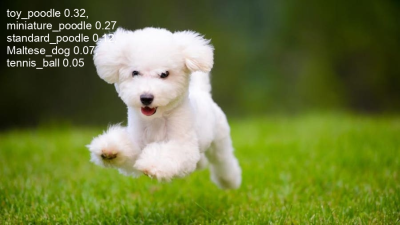

In [12]:
import cv2
import imutils
from google.colab.patches import cv2_imshow

img_path = "/content/drive/MyDrive/YOLOv8 Udemy/1_image_classification/runs/classify/predict/predict1.jpg"

img = cv2.imread(img_path)
img = imutils.resize(img, width=400)
cv2_imshow(img)

In [14]:
import numpy as np
from ultralytics import YOLO

img_path = "runs/classify/predict/predict1.jpg"
model_path = "yolov8l-cls.pt"

model = YOLO(model_path)
results = model.predict(source=img_path, save=True)  # predict on source


class_dict = results[0].names
probs = results[0].probs.data.tolist()

print("Result:", np.argmax(probs))
print("Class:", class_dict[np.argmax(probs)])



image 1/1 /content/drive/MyDrive/YOLOv8 Udemy/1_image_classification/runs/classify/predict/predict1.jpg: 224x224 toy_poodle 0.35, miniature_poodle 0.21, standard_poodle 0.11, Maltese_dog 0.09, tennis_ball 0.06, 297.4ms
Speed: 12.7ms preprocess, 297.4ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
Results saved to runs/classify/predict2
Result: 265
Class: toy_poodle


In [15]:
import numpy as np
from ultralytics import YOLO

img_path = "https://www.sunconengineers.com/wp-content/uploads/2019/01/Influent.png"
model_path = "yolov8l-cls.pt"

model = YOLO(model_path)
results = model.predict(source=img_path, save=True)  # predict on source


class_dict = results[0].names
probs = results[0].probs.data.tolist()

print("Result:", np.argmax(probs))
print("Class:", class_dict[np.argmax(probs)])


100%|██████████| 878k/878k [00:00<00:00, 2.60MB/s]


image 1/1 /content/drive/MyDrive/YOLOv8 Udemy/1_image_classification/Influent.png: 224x224 tripod 0.97, binoculars 0.02, reflex_camera 0.01, hook 0.00, crane_(machine) 0.00, 249.9ms
Speed: 18.9ms preprocess, 249.9ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
Results saved to runs/classify/predict3
Result: 872
Class: tripod


# Training

In [5]:
!unzip covid_classification.zip -d ./data

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: ./data/covid_classification/train/normal/Normal-7273.png  
  inflating: ./data/covid_classification/train/normal/Normal-7274.png  
  inflating: ./data/covid_classification/train/normal/Normal-7275.png  
  inflating: ./data/covid_classification/train/normal/Normal-7276.png  
  inflating: ./data/covid_classification/train/normal/Normal-7277.png  
 extracting: ./data/covid_classification/train/normal/Normal-7278.png  
  inflating: ./data/covid_classification/train/normal/Normal-7279.png  
  inflating: ./data/covid_classification/train/normal/Normal-728.png  
  inflating: ./data/covid_classification/train/normal/Normal-7280.png  
  inflating: ./data/covid_classification/train/normal/Normal-7281.png  
  inflating: ./data/covid_classification/train/normal/Normal-7283.png  
  inflating: ./data/covid_classification/train/normal/Normal-7284.png  
  inflating: ./data/covid_classification/train/normal/Normal-7285.png  
  inflating: ./dat

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/YOLOv8 Udemy/1_image_classification

/content/drive/MyDrive/YOLOv8 Udemy/1_image_classification


In [3]:
%pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 792.5/792.5 kB 8.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [6]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.38 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 31.4/201.2 GB disk)


In [10]:
%pwd

'/content/drive/MyDrive/YOLOv8 Udemy/1_image_classification'

In [20]:
!yolo classify train model=yolov8l-cls.pt data=data/covid_classification imgsz=224 workers=8 batch=16 device=0 epochs=25 name="yolov8_classification"

Ultralytics YOLOv8.2.38 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8l-cls.pt, data=data/covid_classification, epochs=25, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=yolov8_classification, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sho

# Covid Classification / Prediction

In [21]:
!yolo classify predict model=runs/classify/yolov8_classification/weights/best.pt source=inference save=True

Ultralytics YOLOv8.2.38 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l-cls summary (fused): 133 layers, 36188419 parameters, 0 gradients, 98.7 GFLOPs

image 1/15 /content/drive/MyDrive/YOLOv8 Udemy/1_image_classification/inference/COVID-1272.png: 224x224 covid 1.00, viral_pneumonia 0.00, normal 0.00, 11.0ms
image 2/15 /content/drive/MyDrive/YOLOv8 Udemy/1_image_classification/inference/COVID-1314.png: 224x224 covid 1.00, viral_pneumonia 0.00, normal 0.00, 11.0ms
image 3/15 /content/drive/MyDrive/YOLOv8 Udemy/1_image_classification/inference/COVID-1327.png: 224x224 covid 1.00, normal 0.00, viral_pneumonia 0.00, 11.0ms
image 4/15 /content/drive/MyDrive/YOLOv8 Udemy/1_image_classification/inference/COVID-1342.png: 224x224 covid 1.00, normal 0.00, viral_pneumonia 0.00, 11.0ms
image 5/15 /content/drive/MyDrive/YOLOv8 Udemy/1_image_classification/inference/COVID-1445.png: 224x224 covid 1.00, normal 0.00, viral_pneumonia 0.00, 11.0ms
image 6/15 /content/drive/MyDrive/Y

In [22]:
import numpy as np
from ultralytics import YOLO

img_path = "inference/COVID-1445.png"
model_path = "runs/classify/yolov8_classification/weights/best.pt "

model = YOLO(model_path)
results = model.predict(source=img_path, save=True)  # predict on source


class_dict = results[0].names
probs = results[0].probs.data.tolist()

print("Result:", np.argmax(probs))
print("Class:", class_dict[np.argmax(probs)])



image 1/1 /content/drive/MyDrive/YOLOv8 Udemy/1_image_classification/inference/COVID-1445.png: 224x224 covid 1.00, normal 0.00, viral_pneumonia 0.00, 12.3ms
Speed: 7.9ms preprocess, 12.3ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
Results saved to runs/classify/predict5
Result: 0
Class: covid


covid % 99


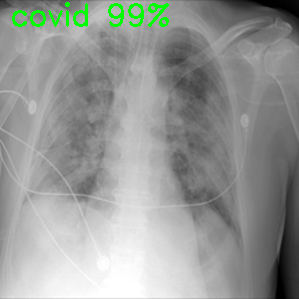

In [25]:
import cv2
from google.colab.patches import cv2_imshow

name = class_dict[np.argmax(probs)]
max_prob = int(np.max(probs) * 100)
print(name,"%", max_prob)

text = f"{name} {max_prob}%"
img = cv2.imread(img_path)
cv2.putText(img, text, (10, 25), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
cv2_imshow(img)
